<br>

# <center>Analyzing Politicians' Tweets during the COVID-19 Pandemic</center>
### <center> A Focus on Canadian First Ministers (Federal and Provincial), the US President, and the UK Prime Minister</center>

###  <center>  By: Jingyi Wang        -    June 19th, 2020 </center>

### Project Background:
The COVID-19 pandemic has impacted almost all countries in the world and has had far-reaching consequences. This crisis presents an unprecedented challenge to world leaders, and for them, nothing is more important than communicating with and taking care of the people. One popular tool of communication used by politicians is Twitter. According to an article on [The Guardian](https://www.theguardian.com/technology/2016/jul/31/trash-talk-how-twitter-is-shaping-the-new-politics), "Twitter is shaping the new politics". Therefore, this analysis uses tweets to understand how politicians connect with people.

### Project Overview:
This project aims to understand how leaders have been engaging with people during the COVID-19 pandemic. More specifically, it plans to investigate what are each leader's communication styles on Twitter, including their frequently used words, their tweets' polarity and subjectivity. This analysis focuses on tweets (from the beginning of February to mid-June) of Canadian first ministers (both federal and provincial), the U.S. President, and the U.K. Prime Minister. 

### Key Findings:
> **Among Donald Trump, Boris Johnson, and Justin Trudeau:** <br>
- Boris Johnson's tweets include more `coronavirus` related words (e.g., "nhs", "coronavirus", "stayalert").
- Donald Trump's tweets are more `politics` related (e.g., "joe", "military", "china", "democrats"). Among his 30 most common words, none of them is covid related, a stark contrast with Boris Johnson and Justin Trudeau. Donald Trump's tweets are the least positive and most subjective among the three leaders.
- Justin Trudeau's tweets include more `coronavirus` and `work` related words. His tweets are the most positive and most objective among the three leaders. 

> **Among Canadian premiers of the 4 most populated provinces:**<br>
All four premiers have common frequently-used words related to covid. Each premier has some unique frequently-used words related to the following topics:
- François Legault (Quebec): `family`, `people`
- Doug Ford (Ontario): `business`, `work`
- John Horgan (British Columbia): `work`
- Jason Kenney (Alberta): `energy`, `jobs`, `economy`


## Content:
[Step 1: Data Gathering](#step1)


[Step 2: Data Wrangling (Except for the Text Data)](#step2)

- 2.1 Deal with language issues (English and French) 
- 2.2 Re-extract Donald Trump's tweets
- 2.3 Change user names (only keep first and last name)
- 2.4 Save the combined, clean dataframe


[Step 3: Cleaning and Organizing the Text Data](#step3)

- 3.1 (Exploration) How many tweets have each Canadian leader twitted?
- 3.2 Clean the 'text' column
- 3.3 Organize the 'text' column <br>
   - 3.3.1 Corpus <br>
   - 3.3.2 Document-Term Matrix (Using CountVectorizer)


[Step 4: Text Data Analysis](#step4)

- 4.1 Find the most common words
- 4.2 Create word clouds for most common words
- 4.3 Second way to create word clouds for most common words (using document-term matrix)
- 4.4 Sentiment Analysis (Polarity & Subjectivity - Comparison Among People)
- 4.5 Sentiment Analysis (Polarity Change Over Time)

[Final Conclusion:](#conclusion)
- Most Common Words
- Sentiment Analysis (Polarity & Subjectivity)

[Appendix](#append)
<br>Entire List of the Most Common Words (Top 30)
- Donald Trump, Boris Johnson, Justin Trudeau
- Premiers of Canadian Provinces and Territories

<br><br>
**Note:** <br>
1. As the Twitter Search API returns at max 3200 of a users' most recent tweets, Donald Trump's tweets were collected from mid March to mid June. Other leaders' tweets were collected from the beginning of February to mid June, to ensure enough amount of tweets for analysis.
2. For this HTML version, many lines are commented out (e.g., the print() functions, etc.) for better readability. Otherwise, the output will be very long and can take up a lot of space. 
3. Dwight Ball, Premier of Newfoundland and Labrador, did not post any tweets this year. Therefore this analysis does not include his tweets.
4. All the retweets are excluded from this analysis, as the purpose of this project is to understand each leader's *own* communication style (their most common words, their tweets' sentiment, etc.)

In [2]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import datetime
import time
import json
import unicodedata
import re
import string
import wordcloud
import scipy
import sys
from wordcloud import WordCloud
from textblob import TextBlob
%matplotlib inline
from scipy.misc.pilutil import imread
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

<a id='step1'></a>
## Step 1: Data Gathering (Twitter API)

Collect tweets from February 1 to June 13th of the following leaders:

**Canadian First Ministers:**
> <br>Justin Trudeau - Prime Minister of Canada
<br>Doug Ford - Premier of Ontario
<br>François Legault - Premier of Quebec
<br>Stephen McNeil - Premier of Nova Scotia
<br>Blaine Higgs - Premier of New Brunswick
<br>Brian Pallister	- Premier of Manitoba
<br>John Horgan	- Premier of British Columbia
<br>Dennis King	- Premier of Prince Edward Island
<br>Scott Moe -	Premier of Saskatchewan
<br>Jason Kenney - Premier of Alberta
<br>Dwight Ball	- Premier of Newfoundland and Labrador
<br>Sandy Silver - Premier of Yukon
<br>Joe Savikataaq - Premier of Nunavut
<br>Caroline Cochrane - Premier of Northwest Territories

**Others:**
> <br>Donald Trump - President of the U.S.
<br>Boris Johnson - Prime Minister of the U.K.

In [2]:
# Create an API object that can be used to gather Twitter data.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
ppl_ids = ['JustinTrudeau', 'fordnation', 'francoislegault', 'StephenMcNeil', 
              'BlaineHiggs', 'BrianPallister', 'jjhorgan', 'dennyking', 'PremierScottMoe',
              'jkenney', 'DwightBallNL', 'Premier_Silver', 'JSavikataaq', 'CCochrane_NWT',
              'BorisJohnson', 'realDonaldTrump'] 

In [4]:
# (Attempt) Limit tweets by time (Taking JustinTrudeau as example)
startDate = datetime.datetime(2020, 2, 1, 0, 0, 0)
endDate = datetime.datetime(2020, 6, 15, 0, 0, 0)

tweets = []
tmpTweets = api.user_timeline('JustinTrudeau')

while (tmpTweets[-1].created_at > startDate):
    # print("Last Tweet @", tmpTweets[-1].created_at, " - fetching some more")
    # print(tmpTweets[0]._json['text'])
    tmpTweets = api.user_timeline('JustinTrudeau', max_id = tmpTweets[-1].id)
    for tweet in tmpTweets:
        if tweet.created_at < endDate and tweet.created_at > startDate:
            tweets.append(tweet)
# tweets

**NOTE:** Some lines of codes (like the print() above) are commented out for better web-page readability. Same for the rest of this notebook.

In [4]:
# (Attempt) Pretty print 2 json file (English & French Text) to understand the structure
jt_first_tw = api.user_timeline('JustinTrudeau', count=1,tweet_mode='extended')
jt_first_tw = json.dumps(jt_first_tw[0]._json)
pprint.pprint(jt_first_tw)

print('-----------------French--------------')

fl_first_tw = api.user_timeline('francoislegault', count=1,tweet_mode='extended')
fl_first_tw = json.dumps(fl_first_tw[0]._json)
pprint.pprint(fl_first_tw)

('{"created_at": "Sun Jun 14 14:17:16 +0000 2020", "id": 1272171249028993024, '
 '"id_str": "1272171249028993024", "full_text": "@FijiPM We\\u2019ll always be '
 'there to help the most vulnerable, including small island states. Thank you '
 'for the conversation, @FijiPM. I look forward to continuing our work on this '
 'important issue - and many others - together.", "truncated": false, '
 '"display_text_range": [8, 222], "entities": {"hashtags": [], "symbols": [], '
 '"user_mentions": [{"screen_name": "FijiPM", "name": "Frank Bainimarama", '
 '"id": 395425451, "id_str": "395425451", "indices": [0, 7]}, {"screen_name": '
 '"FijiPM", "name": "Frank Bainimarama", "id": 395425451, "id_str": '
 '"395425451", "indices": [122, 129]}], "urls": []}, "source": "<a '
 'href=\\"http://twitter.com/download/iphone\\" rel=\\"nofollow\\">Twitter for '
 'iPhone</a>", "in_reply_to_status_id": 1271633262524301313, '
 '"in_reply_to_status_id_str": "1271633262524301313", "in_reply_to_user_id": '
 '39542

Problems identified from steps above:
1. Text sometimes is not complete -> use tweet_mode='extended'
2. Text in English: ' will give messy info -> However, when read in jupyter notebook here, characters look fine. So will leave it as it is for now.
3. Text in French: accents will give messy info in csv -> However, when read in jupyter notebook here, characters look fine. So will leave it as it is for now.
<br>
[More on encoding](https://stackoverflow.com/questions/2477452/%c3%a2%e2%82%ac-showing-on-page-instead-of)

In [5]:
# Get all tweets from all selected people
# Step 1: get tweet JSON data via tweet ID (using Tweepy)
# Step 2: write its JSON data to the "tweet_json.txt" file with each tweet's JSON data on its own line. (Store each tweet's entire set of JSON data in "tweet_json.txt" file.
# Step 3: (Code in next cell) read this "tweet_json.txt" file line by line into a pandas DataFrame with id, created_at, user['name'], text, retweet_count, favorite_count, expanded_url, lang

# Set start & end date for tweets
startDate = datetime.datetime(2020, 2, 1, 0, 0, 0)
endDate =   datetime.datetime(2020, 6, 13, 0, 0, 0)

with open ("tweet_json.txt","w") as outfile: # Step 2: Create a file, name it "tweet_json.txt", and write to it
    # Step 1
    for ppl_id in ppl_ids:
        tmpTweets = api.user_timeline(ppl_id)
        try:
            while (tmpTweets[-1].created_at > startDate):
                # print("Last Tweet @", tmpTweets[-1].created_at, " - fetching some more")
                tmpTweets = api.user_timeline(ppl_id, max_id = tmpTweets[-1].id, tweet_mode='extended') #to ensure the text is complete, not truncated: tweet_mode   
                
                for tweet in tmpTweets:
                    
                    # if within this time window and if not retweet
                    if (tweet.created_at < endDate and tweet.created_at > startDate and 'RT' not in tweet.full_text): 
                        json.dump(tweet._json, outfile) # (Step 2)
                        outfile.write('\n') # Each tweet's JSON data on its OWN line
                        
        except IndexError:
            # print("\n IndexError. User didn't have enough tweets to retrieve ...\n")
            pass

In [9]:
# Step 3: (Con't) read this "tweet_json.txt" file line by line into a pandas df.

# To build a df row by row: Creates an empty list, to which dictionaries will be appended. Then convert this list of dictionaries to a pandas df
selected_cols = []
with open("tweet_json.txt", "r") as fp: 
    for eachline in fp:
        eachline_json = json.loads(eachline)
        selected_cols.append({'id': eachline_json['id'],
                             'created_at': eachline_json['created_at'],
                             'user_name': eachline_json['user']['name'],
                             'text': eachline_json['full_text'],
                             'retweet_count': eachline_json['retweet_count'],
                             'favorite_count': eachline_json['favorite_count'],
                             'language': eachline_json['lang']})
selected_cols = pd.DataFrame(selected_cols, columns=['id', 'created_at','user_name','text','retweet_count','favorite_count','language'])    
selected_cols.head()

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en
1,1271462287082168322,Fri Jun 12 15:20:06 +0000 2020,Justin Trudeau,Je fais le point sur les mesures qu’on prend p...,29,156,fr
2,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en
3,1271442812144402432,Fri Jun 12 14:02:43 +0000 2020,Justin Trudeau,La communauté philippine est parmi celles qui ...,38,211,fr
4,1271249998710288384,Fri Jun 12 01:16:33 +0000 2020,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en


In [11]:
# Save to csv
selected_cols.to_csv('leader_tweets_2020.csv', index=False)

<a id='step2'></a>
## Step 2: Data Wrangling

#### Overview
`2.1` Deal with language issues (English and French) <br>
Delete languages other than English and French, as those tweets also have an English version. For the French language, delete French tweets that are NOT posted by François Legault, as all his posts are in French. For the French tweets that are posted by others, they almost always have an English version of the same tweet.

`2.2` Re-extract Donald Trump's tweets <br>
Delete current Donald Trump's tweets. Re-collect Donald J. Trump's tweets as only 12 were collected in first attemp, due to tweepy limit.

`2.3` Change user names (only keep first and last name) <br>
Change user names for "Premier Joe Savikataaq", "Boris Johnson #StayAlert", and "Donald J. Trump".

`2.4` Save the combined, clean dataframe.

In [90]:
df_raw = pd.read_csv('leader_tweets_2020.csv')
df_raw.head()

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en
1,1271462287082168322,Fri Jun 12 15:20:06 +0000 2020,Justin Trudeau,Je fais le point sur les mesures qu’on prend p...,29,156,fr
2,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en
3,1271442812144402432,Fri Jun 12 14:02:43 +0000 2020,Justin Trudeau,La communauté philippine est parmi celles qui ...,38,211,fr
4,1271249998710288384,Fri Jun 12 01:16:33 +0000 2020,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en


In [94]:
df = df_raw.copy()

In [95]:
df.user_name.value_counts()

Justin Trudeau              1627
Jason Kenney                1224
Doug Ford                    817
Scott Moe                    729
John Horgan                  680
François Legault             607
Blaine Higgs                 372
Premier Joe Savikataaq       352
Stephen McNeil               352
Boris Johnson #StayAlert     272
Brian Pallister              104
Dennis King                   90
Sandy Silver                  88
Caroline Cochrane             29
Donald J. Trump               12
Name: user_name, dtype: int64

#### `2.1 ` Deal with language issues (English and French)
Delete languages other than English and French, as those tweets also have an English version.<br>
For the French language, delete French tweets that are NOT posted by François Legault, as almost all his posts are in French. For the French tweets that are posted by others, they almost always have an English version of the same tweet.

In [97]:
df.language.value_counts()

en     5394
fr      842
und     215
fi       54
in       24
it       11
et        4
pt        3
es        2
ro        2
da        2
pl        1
Name: language, dtype: int64

In [100]:
# Delete languages other than English and French, as those tweets also have an English version. 
# The sentiment analysis can be conducted based on the English version.
df = df[(df['language']=='fr') | (df['language']=='en')]
# Testing
df.language.value_counts()

en    5394
fr     842
Name: language, dtype: int64

In [86]:
df[df.language=='fr']

,id,created_at,user_name,text,retweet_count,favorite_count,language
2444,1271202320097951753,Thu Jun 11 22:07:05 +0000 2020,François Legault,Bonne rencontre avec le ministre de l'économie...,7,80,fr
2445,1271181933830168577,Thu Jun 11 20:46:05 +0000 2020,François Legault,"Aujourd’hui, on annonce la réouverture de plus...",69,178,fr
2446,1271160566850166791,Thu Jun 11 19:21:10 +0000 2020,François Legault,Après la réouverture de plusieurs établissemen...,35,74,fr
2447,1271123001350684674,Thu Jun 11 16:51:54 +0000 2020,François Legault,Les chiffres sur la pandémie au Québec continu...,51,192,fr
2448,1270490862276018181,Tue Jun 09 23:00:00 +0000 2020,François Legault,COVID-19 \n\nVoici les éléments importants à r...,41,141,fr
...,...,...,...,...,...,...,...
7022,1225194526106669061,Wed Feb 05 23:08:32 +0000 2020,Premier Joe Savikataaq,1/2 Le ministre de l’Environnement et du Chang...,2,5,fr
7023,1225194526106669061,Wed Feb 05 23:08:32 +0000 2020,Premier Joe Savikataaq,1/2 Le ministre de l’Environnement et du Chang...,2,5,fr
7029,1225165518149124096,Wed Feb 05 21:13:16 +0000 2020,Premier Joe Savikataaq,Quelle belle journée pour les projets menés pa...,0,0,fr
7033,1224841959874998273,Tue Feb 04 23:47:34 +0000 2020,Premier Joe Savikataaq,"Merci au sénateur Patterson, que nous avons pu...",0,0,fr


In [107]:
# Delete French tweets that are NOT posted by François Legault
df = df[~((df.language=='fr') & (df.user_name!='François Legault'))]

In [108]:
# Testing
df.language.value_counts()

en    5394
fr     572
Name: language, dtype: int64

#### `2.2 ` Re-extract Donald Trump's tweets
Delete current Donald Trump's tweets. Re-collect Donald J. Trump's tweets as only 12 were collected in first attemp. Then append this dataframe to the former one. 

In [113]:
# Delete current Donald Trump's tweets.
df = df[~(df.user_name=='Donald J. Trump')]

In [101]:
# Re-collect Donald Trump's data
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
            "I am awake..."
        except tweepy.RateLimitError:
            time.sleep(5 * 60)
        except StopIteration:
            pass


max_tweets = 10000

all_tweets = limit_handled(tweepy.Cursor(api.user_timeline, screen_name='@realDonaldTrump', tweet_mode='extended').items(max_tweets))
with open ("tweet_json_dt_v2.txt","w") as outfiledt: 
    for tweet in all_tweets:
        if 'RT' not in tweet.full_text: # Delete retweets
            #print(tweet.created_at)
            json.dump(tweet._json, outfiledt)
            outfiledt.write('\n')

In [102]:
selected_cols_dt = []
with open("tweet_json_dt_v2.txt", "r") as fpdt: 
    for eachline in fpdt:
        eachline_json = json.loads(eachline)
        selected_cols_dt.append({'id': eachline_json['id'],
                             'created_at': eachline_json['created_at'],
                             'user_name': eachline_json['user']['name'],
                             'text': eachline_json['full_text'],
                             'retweet_count': eachline_json['retweet_count'],
                             'favorite_count': eachline_json['favorite_count'],
                             'language': eachline_json['lang']})
selected_cols_dt = pd.DataFrame(selected_cols_dt, columns=['id', 'created_at','user_name','text','retweet_count','favorite_count','language'])    

selected_cols_dt.to_csv('dt_tweets_2020_v2.csv', index=False)

In [115]:
df_dt_raw = pd.read_csv('dt_tweets_2020_v2.csv')
df_dt_raw.head()

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1272286399752855552,Sun Jun 14 21:54:50 +0000 2020,Donald J. Trump,THE SILENT MAJORITY IS STRONGER THAN EVER!!!,47540,232733,en
1,1272269338892959744,Sun Jun 14 20:47:02 +0000 2020,Donald J. Trump,Interesting how ANTIFA and other Far Left mili...,44873,165703,en
2,1272266206691672064,Sun Jun 14 20:34:35 +0000 2020,Donald J. Trump,Does anyone notice how little the Radical Left...,33678,128185,en
3,1272172806579662851,Sun Jun 14 14:23:27 +0000 2020,Donald J. Trump,https://t.co/gjBMFDbUps,22517,90702,und
4,1272155593143353347,Sun Jun 14 13:15:03 +0000 2020,Donald J. Trump,Thank you Philip! https://t.co/jGspqbtSgL,15071,88188,en


In [117]:
df_dt_raw.shape

(1439, 7)

In [119]:
# Delete tweets that are not in English
df_dt = df_dt_raw.copy()
df_dt = df_dt[df_dt['language']=='en']

# Testing
df_dt.shape

(1289, 7)

In [122]:
# Append df
df = df.append(df_dt, ignore_index=True)

# Testing
df.shape

(7243, 7)

#### `2.3 ` Change user names (only keep first and last name)
Change user names for "Premier Joe Savikataaq", "Boris Johnson #StayAlert", and "Donald J. Trump".

In [20]:
df['user_name'] = df['user_name'].replace('Premier Joe Savikataaq', 'Joe Savikataaq')
df['user_name'] = df['user_name'].replace('Boris Johnson #StayAlert', 'Boris Johnson')
df['user_name'] = df['user_name'].replace('Donald J. Trump', 'Donald Trump')

#### `2.4 ` Save the combined, clean dataframe.

In [21]:
df.to_csv('leader_tweets_2020_clean.csv', index=False)

**NOTE:** 
- Tweepy only allows users to retrieve the 3200 most recent tweets. Therefore, Donald Trump's oldest tweet in this dataset was on Mar 12th.

<a id='step3'></a>
## Step 3: Cleaning and Organizing the Text Data
<br>
Overview:

`3.1` (Exploration) How many tweets have each Canadian leader twitted?
<br>
`3.2` Clean the 'text' column
<br>
`3.3` Organize the 'text' column
<br>
&emsp;&emsp; `- 3.3.1` Corpus
<br>
&emsp;&emsp; `- 3.3.2` Document-Term Matrix (Using CountVectorizer)

In [3]:
df_original = pd.read_csv('leader_tweets_2020_clean.csv')
df = df_original.copy()
df.head()

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en
1,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en
2,1271249998710288384,Fri Jun 12 01:16:33 +0000 2020,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en
3,1271223008565354497,Thu Jun 11 23:29:18 +0000 2020,Justin Trudeau,Did you notice a big sticker that says #POSTPr...,139,712,en
4,1271194811295547404,Thu Jun 11 21:37:15 +0000 2020,Justin Trudeau,They switched gears when COVID-19 hit because ...,50,326,en


#### `3.1 ` How many tweets have each Canadian leader twitted from February to early June? 
Note: For the purpose of this project, this analysis only counted French tweets of François Legault, and English tweets of other first ministers. Also, retweets were not included. 


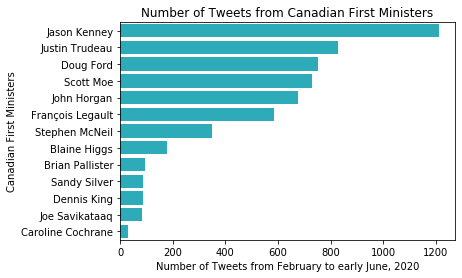

In [164]:
# Temporarily override the users order
level_order = ['Jason Kenney', 'Justin Trudeau', 'Doug Ford', 'Scott Moe',
       'John Horgan', 'François Legault', 'Stephen McNeil', 
       'Blaine Higgs', 'Brian Pallister', 'Sandy Silver', 'Dennis King',
       'Joe Savikataaq', 'Caroline Cochrane']
ordered_category = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['user_name'] = df['user_name'].astype(ordered_category)

sns.countplot(data = df, y = 'user_name', color='powderblue');

plt.ylabel('Canadian First Ministers');
plt.xlabel('Number of Tweets from February to early June, 2020')
plt.title('Number of Tweets from Canadian First Ministers');

#### `3.2 ` Clean the 'text' column
With text data, text pre-processing techniques can be applied. Follow the MVP (minimum viable product) approach - start simple and iterate. 

**This analysis will take the following data cleaning steps on all text:**
- Make text all lower case
- Remove punctuation
- Remove words with @
- Remove words with http
- Remove words starting with number
- Tokenize text (split text into smaller pieces)
- Remove stop words

In [19]:
df.head(20)['text']

0     I’m giving an update on the steps we’re taking...
1     The Filipino community is one of the fastest g...
2     This evening, @cafreeland and I touched base w...
3     Did you notice a big sticker that says #POSTPr...
4     They switched gears when COVID-19 hit because ...
5     This morning, @MonaFortier and I visited Régim...
6     100 years young! Elder Qaapik Attagutsiak is a...
7     Manon Savard has been appointed as Chief Justi...
8     Earlier today, I spoke with the President of R...
9     Across the country, businesses are starting to...
10    This year’s graduates have had to make a lot o...
11    This year’s graduates have had to make a lot o...
12    We’ve launched a hotline service for entrepren...
13    Prime Minister @O_Spasovski and I had a call t...
14    Nothing can take away all that you have accomp...
15    To the class of 2020: Congratulations! This pr...
16    Instead of my daily update this morning, I’ll ...
17    There are so many stories like this one ou

In [5]:
def clean_text(input_text):
    input_text = input_text.lower() #lower case
    input_text = re.sub('[%s]' % re.escape(string.punctuation), '', input_text) #Remove punctuation
    input_text = re.sub('@.+','',input_text) #Remove words with @ 
    input_text = re.sub('http.+','',input_text) # Remove words with http
    input_text = re.sub('\d+','',input_text) # Remove numbers
    input_text = re.sub('\d\w*','',input_text) # Remove words starting with number
    return input_text

clean_function = lambda x: clean_text(x)

#### `3.3 ` Organize the 'text' column
This analysis will organize data in two standard text formats:

- Corpus - a collection of text
- Document-Term Matrix - word counts in matrix format

For this step, a new df will be created, including only user_name and text. Also, all tweets of each person will be conbined into one cell. (Thus 15 people, 15 rows.)

In [6]:
# Combine each person's all tweets into one chunk.
df_text_only = df.copy()
df_text_only = df_text_only[['user_name','text']]

# use the function defined in the cell above
df_text_only['text'] = df_text_only['text'].apply(clean_function)

# Concatenate strings from several rows using groupby
df_text_only = df_text_only.groupby(['user_name'])['text'].apply(lambda x: ' '.join(x)).reset_index() 

df_text_only

,user_name,text
0,Blaine Higgs,cbs responded quickly by strengthening routine...
1,Boris Johnson,we all have a part to play in stopping the spr...
2,Brian Pallister,we want to hear from you manitoba covidmb i’m...
3,Caroline Cochrane,if you think you may have symptoms of covid yo...
4,Dennis King,years ago today was veday in europe our world...
5,Donald Trump,the silent majority is stronger than ever inte...
6,Doug Ford,today we announced the launch of ontario live ...
7,François Legault,bonne rencontre avec le ministre de léconomie ...
8,Jason Kenney,many businesses will still be working to devel...
9,Joe Savikataaq,systemic racism and unconscious bias are real ...


#### `3.3.1 ` Corpus

In [7]:
# Already created a corpus in the earlier step. 
df_text_only.head(5) # Each row represents each person's all tweets

,user_name,text
0,Blaine Higgs,cbs responded quickly by strengthening routine...
1,Boris Johnson,we all have a part to play in stopping the spr...
2,Brian Pallister,we want to hear from you manitoba covidmb i’m...
3,Caroline Cochrane,if you think you may have symptoms of covid yo...
4,Dennis King,years ago today was veday in europe our world...


In [8]:
df.head(2) # Each row represents each tweet

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en
1,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en


#### `3.3.2 ` Document-Term Matrix (Using CountVectorizer)

In [9]:
# Create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv_en = CountVectorizer(stop_words='english') 
data_cv_en = cv_en.fit_transform(df_text_only.text)

df_text_only_dtm = pd.DataFrame(data_cv_en.toarray(), columns=cv_en.get_feature_names())
df_text_only_dtm.index = df_text_only['user_name']
df_text_only_dtm.head(3)

,aaa,ab,ababa,abandon,abandoned,abandoning,abattre,abbey,abbigail,abbotsford,...,évolution,évènements,êtes,être,œuvre,željko,𝘌𝘢𝘤𝘩,𝘓𝘪𝘧𝘵,𝘖𝘵𝘩𝘦𝘳,𝘜𝘱
user_name,,,,,,,,,,,,,,,,,,,,,
Blaine Higgs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boris Johnson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Brian Pallister,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Pickle it for later use
import pickle
df_text_only_dtm.to_pickle("df_text_only_dtm.pkl")

# Also pickle the cleaned data (before put it in document-term matrix format) and the CountVectorizer object
df_text_only.to_pickle('df_text_only.pkl')
pickle.dump(cv_en, open("cv.pkl", "wb"))

<a id='step4'></a>
## Step 4: Text Data Analysis
Overview 
<br><br>
`4.1 ` Find the most common words  <br>
`4.2 ` Create word clouds for most common words <br>
`4.3 ` Second way to create word clouds for most common words (using the result from document-term matrix)<br>
`4.4 ` Sentiment Analysis (Polarity & Subjectivity - Comparison Among People) <br>
`4.5 ` Sentiment Analysis (Polarity Change Over Time)

`4.1 ` **Find the most common words**

In [10]:
df_text_only_dtm = pd.read_pickle('df_text_only_dtm.pkl')
df_text_only_dtm.head(2)

,aaa,ab,ababa,abandon,abandoned,abandoning,abattre,abbey,abbigail,abbotsford,...,évolution,évènements,êtes,être,œuvre,željko,𝘌𝘢𝘤𝘩,𝘓𝘪𝘧𝘵,𝘖𝘵𝘩𝘦𝘳,𝘜𝘱
user_name,,,,,,,,,,,,,,,,,,,,,
Blaine Higgs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boris Johnson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Transpose df, as it work better when operations are conducted on cols
df_text_only_dtm = df_text_only_dtm.transpose()
df_text_only_dtm.head(2)

user_name,Blaine Higgs,Boris Johnson,Brian Pallister,Caroline Cochrane,Dennis King,Donald Trump,Doug Ford,François Legault,Jason Kenney,Joe Savikataaq,John Horgan,Justin Trudeau,Sandy Silver,Scott Moe,Stephen McNeil
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ab,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0


In [13]:
# Find the top 30 words posted by each leader.
top30_dict = {}

for ppl in df_text_only_dtm.columns:
    top = df_text_only_dtm[ppl].sort_values(ascending=False).head(30)
    # each item in the dictionary: key is ppl, value is a list 
    top30_dict[ppl] = list(zip(top.index, top.values))

top30_dict['Justin Trudeau'] 

[('covid', 227),
 ('help', 211),
 ('today', 202),
 ('need', 197),
 ('canada', 182),
 ('amp', 170),
 ('support', 147),
 ('country', 143),
 ('ll', 131),
 ('people', 126),
 ('work', 124),
 ('safe', 113),
 ('canadians', 112),
 ('working', 105),
 ('ve', 103),
 ('make', 97),
 ('spoke', 97),
 ('sure', 91),
 ('time', 80),
 ('business', 80),
 ('new', 79),
 ('health', 79),
 ('home', 78),
 ('doing', 77),
 ('workers', 73),
 ('update', 64),
 ('live', 63),
 ('details', 63),
 ('watch', 63),
 ('know', 60)]

**NOTE:** At this point, could go on and create word clouds. However, by looking at these top words, we can see that some of them have very little meaning and could be added to a stop words list.
<br><br>
Next steps: add new stopwords
<br>
- Add French stopwords
- Add additional English stopwords including: amp, ll, ve, 

In [14]:
# Read in cleaned data
df_text_only = pd.read_pickle('df_text_only.pkl')
df_text_only_v2 = df_text_only.copy()

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

final_stopwords_list = list(fr_stop) + list(en_stop)
#print(final_stopwords_list)
final_stopwords_list.extend(['amp', 'll', 've', 'qu'])

# Recreate document-term matrix
cv = CountVectorizer(stop_words=final_stopwords_list)
data_cv = cv.fit_transform(df_text_only_v2.text)
df_text_only_v2_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_text_only_v2_dtm.index = df_text_only_v2['user_name']

df_text_only_v2_dtm.head(2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,aaa,ab,ababa,abandon,abandoned,abandoning,abattre,abbey,abbigail,abbotsford,...,évité,évolution,évènements,êtes,œuvre,željko,𝘌𝘢𝘤𝘩,𝘓𝘪𝘧𝘵,𝘖𝘵𝘩𝘦𝘳,𝘜𝘱
user_name,,,,,,,,,,,,,,,,,,,,,
Blaine Higgs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boris Johnson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_text_only_v2_dtm = df_text_only_v2_dtm.transpose()
df_text_only_v2_dtm.head(2)

user_name,Blaine Higgs,Boris Johnson,Brian Pallister,Caroline Cochrane,Dennis King,Donald Trump,Doug Ford,François Legault,Jason Kenney,Joe Savikataaq,John Horgan,Justin Trudeau,Sandy Silver,Scott Moe,Stephen McNeil
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ab,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0


In [15]:
# Again, find the top 30 words
top30_dict = {}

for ppl in df_text_only_v2_dtm.columns:
    top = df_text_only_v2_dtm[ppl].sort_values(ascending=False).head(30)
    top30_dict[ppl] = list(zip(top.index, top.values))

In [149]:
# Pickle the new dtm (Included both EN & FR stopwords)
df_text_only_v2_dtm.to_pickle('df_text_only_v2_dtm.pkl')

<br>

`4.2 ` **Create word clouds for most common words**

In [14]:
# Look at the df again
df_text_only_v2_dtm.head(2)

user_name,Blaine Higgs,Boris Johnson,Brian Pallister,Caroline Cochrane,Dennis King,Donald Trump,Doug Ford,François Legault,Jason Kenney,Joe Savikataaq,John Horgan,Justin Trudeau,Sandy Silver,Scott Moe,Stephen McNeil
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ab,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0


In [18]:
# Look at the df again
df_text_only_v2.head(2)

,user_name,text
0,Blaine Higgs,cbs responded quickly by strengthening routine...
1,Boris Johnson,we all have a part to play in stopping the spr...


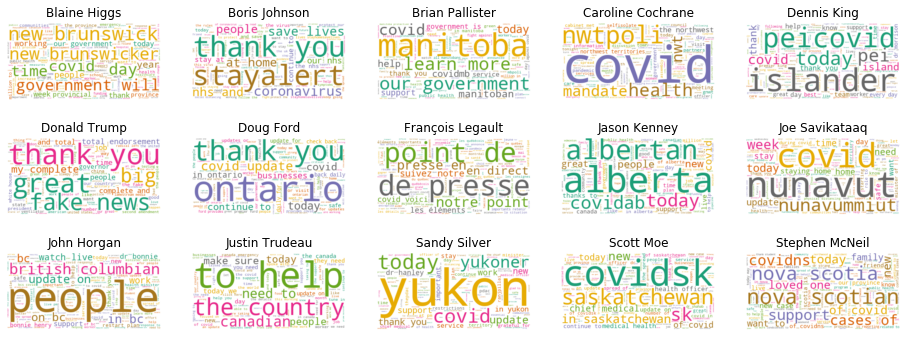

In [21]:
final_stopwords_list.append('dan') # Get rid of the wrongly tokenized word
wc = WordCloud(stopwords=final_stopwords_list, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16,6]

# Create subplots for each leader
for index, ppl in enumerate(df_text_only_v2_dtm.columns):
    wc.generate(df_text_only_v2.iloc[index,1])
    
    plt.subplot(3,5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ppl)
    
plt.show()

**NOTE:** <br>
This word cloud doesn't have the same output as the document-term matrix (due to different tokenization method). Therefore, create another word cloud based on the document-term matrix. (Using top30_dict)

<br>
Next steps: <br>
Create a new df with 2 cols. The first col is name, the second col contains only their top 80 words, each word appears the same times as shown in top80_dict.




<br>

`4.3 ` **Second way to create word clouds for most common words (using the result from document-term matrix)**

- Step 1: Create a new dict, with same keys as top80_df, but different values. Its values should be all the words in one list.         (Each word appears the same times as shown in top80_df)

- Step 2: Read this dictionary into a df

- Step 3: Use this new df to create word cloud

In [16]:
# Find the top 80 words 
top80_dict = {}

for ppl in df_text_only_v2_dtm.columns:
    top = df_text_only_v2_dtm[ppl].sort_values(ascending=False).head(80)
    top80_dict[ppl] = list(zip(top.index, top.values))

In [17]:
# Step 1: Create a new dict, with same keys as top80_df, but different values. 
#       Its values should be all the words in one list. (Each word appears the same times as shown in top80_df)
def multiply_words(input_list):
    '''(list a tuples) -> (list)
    >>> [('a',3), ('b',2)]
    ['a','a','a','b','b']'''
    
    multiplied = []
    for tup in input_list:
        count = 0
        while count < tup[1]:
            multiplied.append(tup[0])
            count += 1
    return multiplied
          
    
top_80_chunk = {}
for k, v in top80_dict.items():
    top_80_chunk[k] = multiply_words(v)

#top_80_chunk 

In [58]:
# Step 2: Read this dictionary into a df. Create df row by row.
top80_df = pd.DataFrame(columns = ['user_name','top80_words'])
index = 0
for k, v in top_80_chunk.items():
    top80_df.loc[index] = [k, ' '.join(v)] # v is a list. Use ' '.join(v) to convert list to string
    index += 1
top80_df

,user_name,top80_words
0,Blaine Higgs,new new new new new new new new new new new ne...
1,Boris Johnson,nhs nhs nhs nhs nhs nhs nhs nhs nhs nhs nhs nh...
2,Brian Pallister,manitoba manitoba manitoba manitoba manitoba m...
3,Caroline Cochrane,covid covid covid covid covid covid covid covi...
4,Dennis King,islanders islanders islanders islanders island...
5,Donald Trump,great great great great great great great grea...
6,Doug Ford,covid covid covid covid covid covid covid covi...
7,François Legault,point point point point point point point poin...
8,Jason Kenney,alberta alberta alberta alberta alberta albert...
9,Joe Savikataaq,covid covid covid covid covid covid covid covi...


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


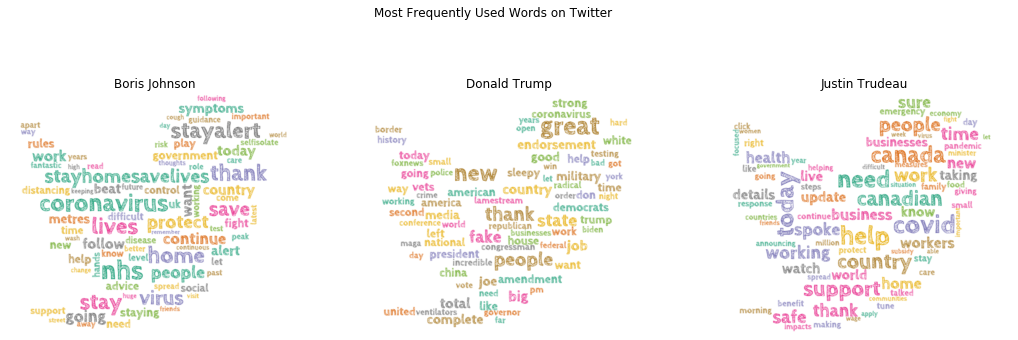

In [150]:
# Use twitter mask
twitter_mask = imread('./twitter_mask.png', flatten=True)

wc = WordCloud(stopwords=final_stopwords_list, background_color="white", colormap="Dark2",prefer_horizontal=0.99,
               font_path='/Users/jingyi/Desktop/Fake_News/cabinsketch/CabinSketch-Bold.otf',
               collocations=False, max_font_size=90, min_font_size=10, max_words=80, mask=twitter_mask,width=1800,height=1400)
plt.rcParams['figure.figsize'] = [18,6]

# Create subplots for each leader
df_3_ppl = top80_df[(top80_df['user_name']=='Boris Johnson') | (top80_df['user_name']=='Donald Trump') | (top80_df['user_name']=='Justin Trudeau')]

for index, ppl in enumerate(df_3_ppl.user_name):
    wc.generate(df_3_ppl.iloc[index,1]) 
    
    plt.subplot(1,3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ppl)
    
plt.suptitle('Most Frequently Used Words on Twitter')
plt.savefig('./twitter_3ppl_wordcloud_v2.png', dpi=500)
plt.show()

### `Conclusion from the Output above:`
> Boris Johnson's tweets have many `covid` related words. For example, "nhs", "coronavirus", "lives" are the top 3 words that appeared most frequently in his tweets. "stayalert", "virus", "stayhomesavelives", "symptoms" rank 5th, 9th, 10th, 22nd respectively. Having defeated the virus, the British Prime Minister is clearly staying alert against the coronavirus, as indicated in his Twitter user name (Boris Johnson #StayAlert).

> Donald Trump's most common words cover `various topics`. His tweets are, compared with Boris Johnson, less coronavirus-related. In fact, "covid", "virus", or "coronavirus" are not even among his 30 most common words. (All the other 14 leaders have covid-related words in their top 10 most common words.) "great", "news", "thank", "people", "fake" are his top 5 words. Some other words in his top 30 word list are: "joe", "military", "china", and "democrats", ranking 14th, 17th, 24th, and 29th respectively.

> Justin Trudeau's most common words on Twitter are both `covid` and `work` related. "covid", "help", "today" are the top 3 words that appeared most frequently in his tweets. Some other words in his top 30 word list are: "work", "working", "business", "workers", "businesses", ranking 9th, 12th, 15th, 20th, and 28th respectively. 

**NOTE:**  To see all the 30 most common words used by each person, please refer to the cell below.<br>

In [88]:
print("Most Common Words (Top 30):")
print('')
for ppl, word_count in top30_dict.items():
    if (ppl == 'Boris Johnson') | (ppl == 'Donald Trump') | (ppl == 'Justin Trudeau'):
        print(f'{ppl}:')
        print(', '.join([word for word, ncount in word_count])) 
        print('')

Most Common Words (Top 30):

Boris Johnson:
nhs, coronavirus, lives, thank, stayalert, home, stay, save, virus, stayhomesavelives, protect, people, going, continue, work, today, country, want, follow, beat, alert, symptoms, metres, government, staying, rules, fight, help, advice, new

Donald Trump:
great, news, thank, people, fake, big, job, new, total, country, states, complete, endorsement, joe, good, media, military, like, state, strong, president, house, american, china, today, time, amendment, white, democrats, vets

Justin Trudeau:
covid, help, today, need, canada, support, country, people, work, safe, canadians, working, spoke, sure, business, time, new, health, home, workers, update, live, watch, details, know, world, taking, businesses, emergency, right



/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


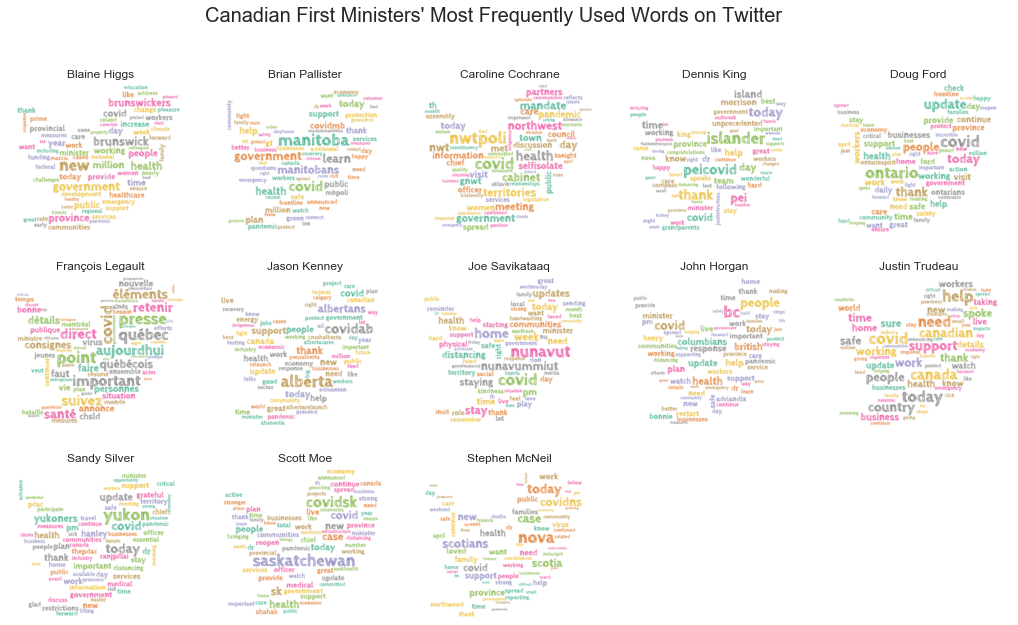

In [251]:
# Use same code for Canadian First Ministers
twitter_mask = imread('./twitter_mask.png', flatten=True)

wc = WordCloud(stopwords=final_stopwords_list, background_color="white", colormap="Dark2",prefer_horizontal=0.99,
               font_path='/Users/jingyi/Desktop/Fake_News/cabinsketch/CabinSketch-Bold.otf',
               collocations=False, max_font_size=90, min_font_size=10, max_words=70, mask=twitter_mask,width=1400,height=1400)
plt.rcParams['figure.figsize'] = [18,10]

# Create subplots for each leader
df_ca_ppl = top80_df[~((top80_df['user_name']=='Boris Johnson') | (top80_df['user_name']=='Donald Trump'))]

for index, ppl in enumerate(df_ca_ppl.user_name):
    wc.generate(df_ca_ppl.iloc[index,1]) 
    
    plt.subplot(3,5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ppl)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    
plt.suptitle('Canadian First Ministers\' Most Frequently Used Words on Twitter', fontsize=20)
plt.savefig('./twitter_ca_wordcloud.png', dpi=500)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


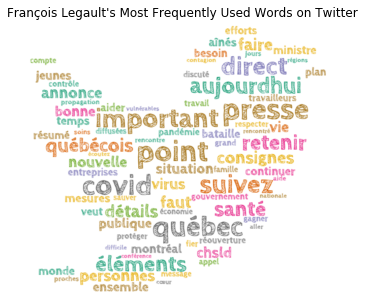

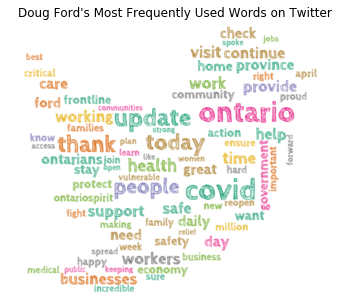

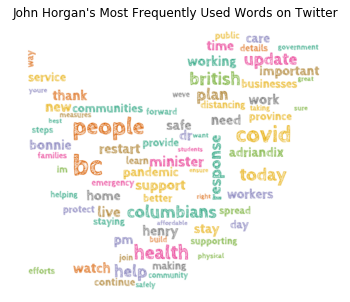

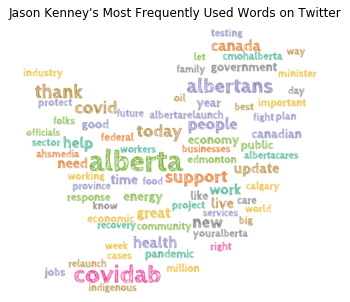

In [146]:
# Look at each person's tweets. Define a new function
def draw_single_person_twitter(input_df):
    twitter_mask = imread('./twitter_mask.png', flatten=True)

    wc = WordCloud(stopwords=final_stopwords_list, background_color="white", colormap="Dark2",prefer_horizontal=0.99,
                   font_path='/Users/jingyi/Desktop/Fake_News/cabinsketch/CabinSketch-Bold.otf',
                   collocations=False, max_font_size=90, min_font_size=10, max_words=80, mask=twitter_mask,width=1800,height=1400)
    plt.rcParams['figure.figsize'] = [7,5]


    wc.generate(input_df.iloc[0,1]) 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")


# François Legault
df_fl = top80_df[top80_df['user_name']=='François Legault']
draw_single_person_twitter(df_fl)
plt.title('François Legault\'s Most Frequently Used Words on Twitter')
plt.savefig('./twitter_fl_2_wordcloud.png', dpi=500)
plt.show()

# Doug Ford
df_df = top80_df[top80_df['user_name']=='Doug Ford']
draw_single_person_twitter(df_df)
plt.title('Doug Ford\'s Most Frequently Used Words on Twitter')
plt.savefig('./twitter_df_wordcloud.png', dpi=500)
plt.show()

# John Horgan
df_jh = top80_df[top80_df['user_name']=='John Horgan']
draw_single_person_twitter(df_jh)
plt.title('John Horgan\'s Most Frequently Used Words on Twitter')
plt.savefig('./twitter_jh_wordcloud.png', dpi=500)
plt.show()

# Jason Kenney
df_jk = top80_df[top80_df['user_name']=='Jason Kenney']
draw_single_person_twitter(df_jk)
plt.title('Jason Kenney\'s Most Frequently Used Words on Twitter')
plt.savefig('./twitter_jk_wordcloud.png', dpi=500)
plt.show()

### `Conclusion from the Output above:`
> There are many over-lapping common words used by all the Premiers of the four most populated provinces (for example, covid, health (or santé)). However, by looking at the most common **unique** words used by each Premier, we can observe some interesting facts. Among each person's top 30 most common words:
- François Legault, premier of Quebec, has more words related to `family` or `people`. For example, "jeunes" (or, young people) ranks 26th and "aînés" (or, the elderly) ranks 27th. There are not any work or business related words among his top 30 most common words on Twitter. <br><br>
- Doug Ford, premier of Ontario, has more words related to `business` or `work`. For example, "work" ranks 8th, "workers" ranks 10th, and "businesses" ranks 12th among his most common words on Twitter. <br><br>
- John Horgan, premier of British Columbia, used more `work`-related words in his Tweets. For example, "work" ranks 18th and "restart" ranks 21st. <br><br> 
- Jason Kenney, premier of Alberta, has more words related to `energy`, `jobs`, and `economy`. For example, "work" ranks 13th, "energy" ranks 19th, "economy" ranks 21st, "jobs" ranks 27th, "economic" ranks 28th. 

<br>

`4.4 ` **Sentiment Analysis (Polarity & Subjectivity - Comparison Among People)** <br>
<br>Use TextBlob Module. TextBlob can analyze sentiment by calculating *Polarity* and *Subjectivity*. 
- Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
- Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
[More on TextBlob](https://planspace.org/20150607-textblob_sentiment/)

In [18]:
# For sentiment analysis, word order is important. Thus, use the corpus, not the document-term matrix.
corpus = df.groupby('user_name')['text'].apply(lambda x: ' '.join(x)).reset_index()
corpus.head(3)

,user_name,text
0,Blaine Higgs,CBS responded quickly by strengthening routine...
1,Boris Johnson,We all have a part to play in stopping the spr...
2,Brian Pallister,We want to hear from you Manitoba! #covid19MB ...


In [19]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

corpus['polarity'] = corpus['text'].apply(pol)
corpus['subjectivity'] = corpus['text'].apply(sub)
corpus.head(3)

,user_name,text,polarity,subjectivity
0,Blaine Higgs,CBS responded quickly by strengthening routine...,0.182332,0.459768
1,Boris Johnson,We all have a part to play in stopping the spr...,0.187085,0.493589
2,Brian Pallister,We want to hear from you Manitoba! #covid19MB ...,0.273802,0.494445


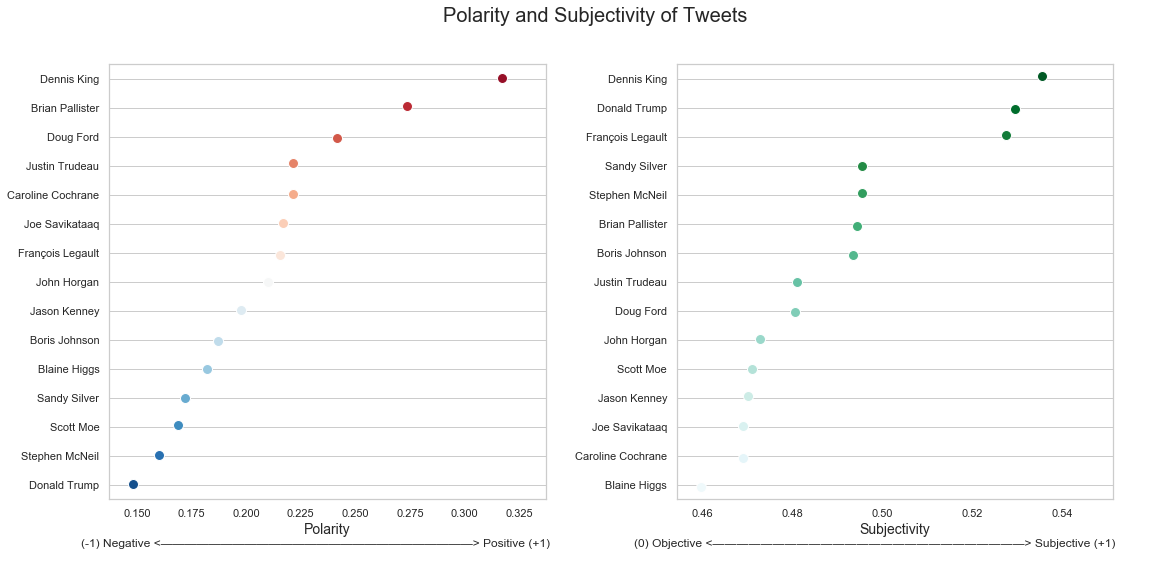

In [250]:
plt.figure(figsize = [18, 8])
sns.set(style="whitegrid")

# 1st plot
plt.subplot(1, 2, 1)
sns.stripplot(x=corpus["polarity"],y=corpus['user_name'],size=10, orient="h",
              order=corpus.sort_values(by=['polarity'], ascending=False).user_name,
              palette="RdBu", linewidth=1, edgecolor="w");
plt.xlabel('Polarity', fontdict = {'fontsize' : 14});
plt.ylabel('');
ax = plt.gca() 
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.annotate('(-1) Negative <——————————————————————————> Positive (+1)', xy=(0.27, 0.03), 
            horizontalalignment='center', xycoords='figure fraction')

plt.subplots_adjust(wspace = 0.3) #the amount of width reserved for space between subplots


# 2nd plot
plt.subplot(1, 2, 2)
sns.stripplot(x=corpus["subjectivity"],y=corpus['user_name'],size=10, orient="h",
              order=corpus.sort_values(by=['subjectivity'], ascending=False).user_name,
              palette="BuGn_r", linewidth=1, edgecolor="w");
plt.xlabel('Subjectivity', fontdict = {'fontsize' : 14});
plt.ylabel('');
ax.annotate('(0) Objective <——————————————————————————> Subjective (+1)', xy=(0.75, 0.03), 
            horizontalalignment='center', xycoords='figure fraction')

plt.suptitle('Polarity and Subjectivity of Tweets', fontsize=20);

ax = plt.gca() 
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.savefig('./twitter_sentiment.png', dpi=500)

### `Conclusion from the Output above:`
> - In terms of polarity, Dennis King's tweets are, on average, the most positive among all the 15 leaders, while Donald Trump's tweets are the least positive. <br>
> - In terms of subjectivity, Dennis King's posts are, on average, the most subjective among all leaders, followed by Donald Trump. Blaine Higgs' tweets are the most objective among these politicians.

<br>

`4.5 ` **Sentiment Analysis (Polarity Change Over Time)**

In [17]:
# This time, use df, where each row represents each tweet
df.head(3)

,id,created_at,user_name,text,retweet_count,favorite_count,language
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en
1,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en
2,1271249998710288384,Fri Jun 12 01:16:33 +0000 2020,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en


In [18]:
# Apply Sentiment Analysis on the original df. Create 2 new cols
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)
df.head(3)

,id,created_at,user_name,text,retweet_count,favorite_count,language,polarity,subjectivity
0,1271462308229926913,Fri Jun 12 15:20:11 +0000 2020,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en,0.409091,0.6
1,1271442842217578498,Fri Jun 12 14:02:50 +0000 2020,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en,1.000000,1.0
2,1271249998710288384,Fri Jun 12 01:16:33 +0000 2020,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en,-0.100000,0.5


In [19]:
# convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df.head(3)

,id,created_at,user_name,text,retweet_count,favorite_count,language,polarity,subjectivity
0,1271462308229926913,2020-06-12 15:20:11+00:00,Justin Trudeau,I’m giving an update on the steps we’re taking...,92,526,en,0.409091,0.6
1,1271442842217578498,2020-06-12 14:02:50+00:00,Justin Trudeau,The Filipino community is one of the fastest g...,423,2030,en,1.000000,1.0
2,1271249998710288384,2020-06-12 01:16:33+00:00,Justin Trudeau,"This evening, @cafreeland and I touched base w...",306,2432,en,-0.100000,0.5


In [51]:
# Create a sub-df which only include 3 people (Justin Trudeau, Donald Trump, Boris Johnson)'s tweets from March 15th to June 12th

df_3ppl = df[((df['user_name']=='Justin Trudeau') | (df['user_name']=='Donald Trump') | (df['user_name']=='Boris Johnson'))
             & (df['created_at']>'2020-03-14') & (df['created_at']<'2020-06-02')]

df_3ppl.shape      

(1785, 9)

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple 

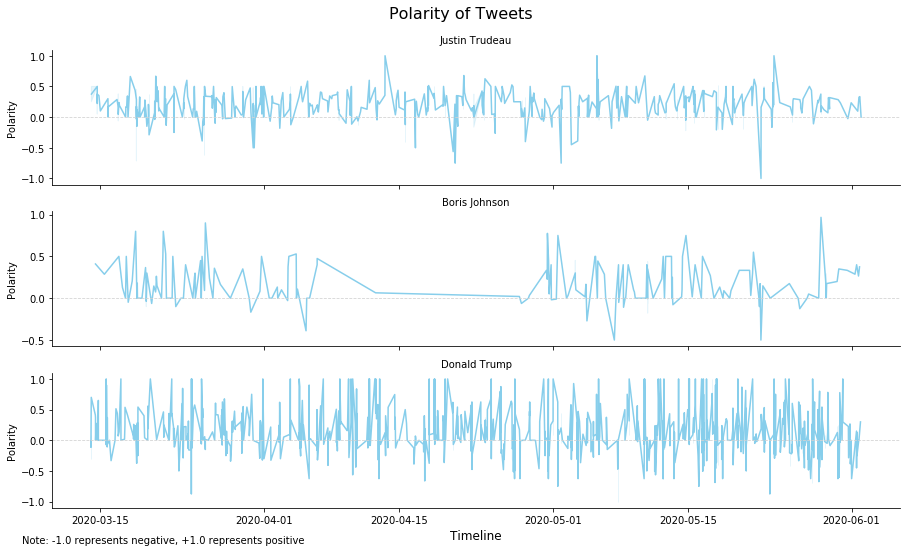

In [61]:
# Polarity Over Time
#plt.figure(figsize=(6,16));

# 1st plot
g = sns.FacetGrid(data = df_3ppl, col = 'user_name', height=2.5, aspect=5, col_wrap=1, sharey=False)
g.map(sns.lineplot, "created_at",'polarity', color='skyblue')
g.map(plt.axhline, y=0, color='lightgray', linestyle='--', linewidth=0.8);
g.set_ylabels('Polarity')
g.set_titles('{col_name}');

plt.xlabel('Timeline',fontdict = {'fontsize' : 12});


# Add a title for all subplots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Polarity of Tweets', fontsize=16);

ax = plt.gca()
ax.grid(False)
ax.annotate('Note: -1.0 represents negative, +1.0 represents positive', xy=(0.18, 0.01), 
             horizontalalignment='center', xycoords='figure fraction');
plt.savefig('./polarity_over_time.png', bbox_inches = "tight", dpi=500) # use bbox_inches to ensure no cut-off

### `Conclusion from the Output above:`
>Although the polarity fluctuates over time, in general, Justin Trudeau's and Boris Johnson's tweets are more positive. There is a flat line in Boris Johnson's tweets polarity due to his hospitalization. He did not posted any content on Twitter between April 13th and April 26th, 2020. <br><br>
On the other hand, Donald Trump's tweets generally have stronger emotions, either positive or negative. 
<br><br>
All three leaders posted negative sentiment tweets towards the end of May (between May 15 and June 1). Out of personal curiosity, I tried to investigate if those negative tweets were on the same topic (for example, some international events or global issues). I looked at these three leaders' most negative tweet in this time window. The results are the following:
<br>

> >**Justin Trudeau's tweet on May 22nd:**<br> 
"The news from Pakistan this morning is devastating. To the families and friends of those who lost their lives in the crash of PK 8303, and to everyone affected by this terrible tragedy, our hearts go out to you. Canadians are keeping you in our thoughts today." <br>
**Donald Trump's tweet on May 23nd:** <br> 
"So bad!" (with a url referring to his previous tweet "DOJ: Democrats Paid Pennsylvania Election Officials to Stuff Ballot Box") <br>
**Boris Johnson's tweet on May 22nd:** <br> 
"Seven years on from his murder on a London street, we remember Fusilier Lee Rigby. On this sad day, my thoughts are with his family, friends and colleagues."

><br>
The results reject the initial hypothesis that the three leaders's most negative tweets were on the same subject. However, it is still meaningful to see what their most negative posts were between May 15 and June 1. While Justin Trudeau and Boris Johnson were grieving over tragedies, Donald Trump was expressing his dissatisfaction with the Democratic Party.

<a id='conclusion'></a>
## Final Conclusion:

#### Most Common Words
>**Comparison among Canadian premiers (QC, ON, BC, AB):** 
<br>Although all four premiers have common frequently-used words related to covid or health, each premier has some unique frequently-used words related to one or more topics:
- François Legault (Quebec): `family`, `people`. 
- Doug Ford (Ontario): `business`, `work`. 
- John Horgan (British Columbia): `work`. 
- Jason Kenney (Alberta): `energy`, `jobs`, `economy`. 

><br>**Comparison among leaders in Canada, US, and UK:**
<br>
- Boris Johnson's frequently-used words are relatively more `coronavirus` related (e.g., "nhs", "coronavirus", "stayalert", "virus", "stayhomesavelives").
- Donald Trump's frequently-used words cover various topics. Compared to the other two leaders, his most common words are less coronavirus related, but more `politics` related (e.g., "joe", "military", "china", "democrats"). In fact, among Donald Trump's top 30 common words, none of them is covid related, a stark contrast with the Prime Ministers of Canada and the U.K. 
- Justin Trudeau's frequently-used words are relatively more `coronavirus` and `work` related (e.g., "covid", "work", "business").<br><br>
*For the entire list of their 30 most common words, please refer to the appendix.*<br>

#### Sentiment Analysis (Polarity and Subjectivity)
> On average, among tweets from Boris Johnson, Donald Trump, and Justin Trudeau:
- Justin Trudeau's tweets are the most positive and most objective. 
- Donald Trump's tweets are the least positive and most subjective. Also his tweets' polarity fluctuates significantly over time.
- Boris Johnson's tweets are in the middle in terms of both polarity and subjectivity.

<a id='append'></a>
## Appendix
### Most Common Words (Top 30)

#### Prime Minister of the U.K., U.S. President, Prime Minister of Canada
|Name|Most Common Words (Top 30)|
| :- |:------------------------:| 
|Boris Johnson|nhs, coronavirus, lives, thank, stayalert, home, stay, save, virus, stayhomesavelives, protect, people, going, continue, work, today, country, want, follow, beat, alert, symptoms, metres, government, staying, rules, fight, help, advice, new|
|Donald Trump|great, news, thank, people, fake, big, job, new, total, country, states, complete, endorsement, joe, good, media, military, like, state, strong, president, house, american, china, today, time, amendment, white, democrats, vets|
|Justin Trudeau|covid, help, today, need, canada, support, country, people, work, safe, canadians, working, spoke, sure, business, time, new, health, home, workers, update, live, watch, details, know, world, taking, businesses, emergency, right|

#### Premiers of Canadian Provinces and Territories
|Name|Most Common Words (Top 30)|
| :- |:------------------------:| 
|Blaine Higgs|new, government, brunswick, health, province, brunswickers, million, covid, people, public, time, working, day, year, today, increase, minister, provincial, provide, care, workers, week, healthcare, like, work, want, thank, communities, change|
|Brian Pallister|manitoba, covid, learn, government, manitobans, health, today, help, covidmb, plan, public, support, thank, gt, million, green, mbpoli, safe, protection, pandemic, services, better, workers, fight, watch, frontline, need, announced, economy|
|Caroline Cochrane|covid, nwtpoli, health, cabinet, territories, nwt, mandate, northwest, meeting, government, town, visit, selfisolate, gnwt, care, pandemic, met, information, partners, today, th, council, spread, officer, chief, day, women, discussion, public|
|Dennis King|islanders, peicovid, today, pei, covid, thank, island, day, help, dr, province, thanks, morrison, team, know, working, great, times, time, unprecedented, best, king, islander, stay, care, like, following, speaks, minister|
|Doug Ford|covid, ontario, thank, today, people, update, health, work, visit, workers, working, businesses, help, safe, continue, support, care, day, province, daily, need, updates, check, great, time, ontarians, ford, home, stay|
|François Legault|point, presse, covid, québec, suivez, direct, aujourdhui, éléments, importants, retenir, santé, québécois, détails, consignes, faire, faut, personnes, annonce, virus, chsld, bonne, situation, publique, ensemble, montréal, jeunes, aînés, mesures, monde|
|Jason Kenney|alberta, covidab, albertans, covid, today, people, health, canada, support, help, great, thanks, work, live, new, update, need, time, energy, thank, economy, good, government, public, like, pandemic, jobs, economic, care|
|Joe Savikataaq|covid, nunavut, home, nunavummiut, stay, week, staying, updates, today, pm, distancing, health, time, communities, minister, safe, physical, play, thank, need, let, know, role, great, right, starting, want, territory, kindness|
|John Horgan|bc, people, covid, bcs, health, british, columbians, update, help, plan, response, live, minister, new, need, support, watch, work, safe, thank, restart, time, today, dr, working, henry, bonnie, home, stay|
|Sandy Silver|yukon, covid, today, yukoners, thank, health, update, hanley, dr, work, plan, new, pm, important, government, services, grateful, stay, support, thepdac, officer, ranjpillai, medical, pdac, chief, restrictions, territory, minister, public|
|Scott Moe|saskatchewan, covidsk, covid, sk, health, new, cases, today, people, live, medical, work, reopen, continue, officer, great, government, chief, communities, businesses, provide, plan, update, dr, province, support, services, shahab, economy|
|Stephen McNeil|nova, today, scotians, covidns, scotia, cases, new, covid, province, health, support, work, need, want, family, loved, public, virus, families, help, time, people, dr, northwood, care, thank, know, continue, day|
